# OCR로 서비스 만들어보기!
Practice 1 : Keras ocr  
Practice 2 : Tesseract  

Hands-on(실습)
- Step1. 검증용 데이터셋  
 * 데이터 모으기
 - 20장 넘기지 않기

- Step2. Google OCR Api, keras-ocr , Tesseract  

- Step3. 테스트 결과 정리  
 - 한눈에 정리해보자
- Step4. 결과 분석 및 결론 제시   

> OCR로 서비스를 만들어보라는 명을 받았다. 일단 어떤 모델들이 있는지 조사가 필요해서 돌려 보았다.
## Practice 1. Keras-ocr 이용하기
[keras-ocr](https://keras-ocr.readthedocs.io/en/latest/index.html)

In [47]:
import matplotlib.pyplot as plt
import keras_ocr
 
pipeline = keras_ocr.pipeline.Pipeline() #detector와 recognizer를 위한 모델 자동 다운로드

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [48]:
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4'
]
#read?
images = [keras_ocr.tools.read(url) for url in image_urls]
#recognition
prediction_groups = [pipeline.recognize([url]) for url in image_urls]


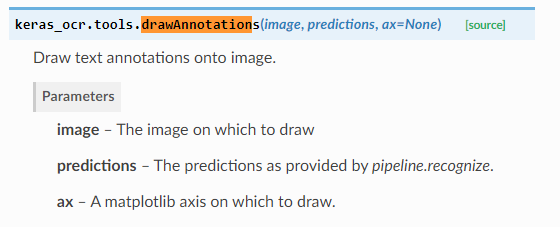

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


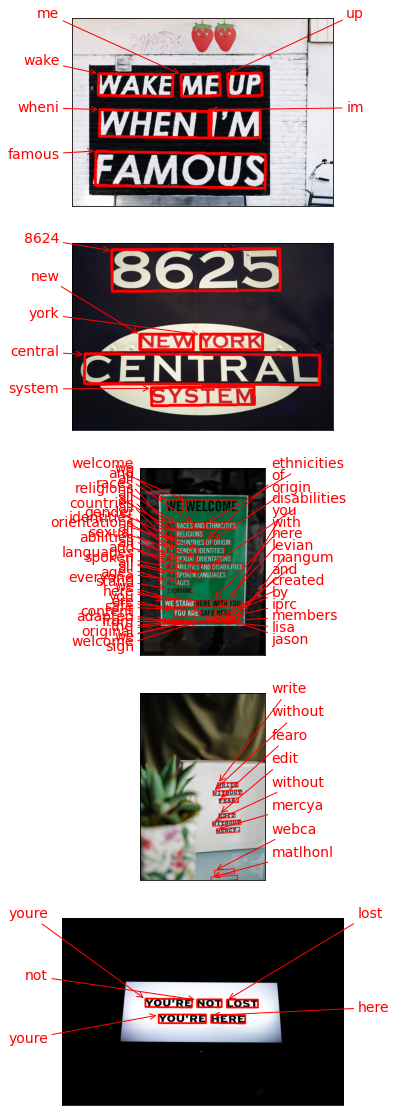

In [50]:
fig, axs = plt.subplots(nrows = len(images), figsize=(20,20))
for idx,ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx],
                                   predictions = prediction_groups[idx][0],
                                    ax=ax
                                   )

`crop_word_regions()` 함수는 여러분이 선택한 테스트 이미지를 받아서, 문자 검출을 진행한 후, 검출된 문자 영역을 crop한 이미지로 만들어 그 파일들의 list를 리턴하는 함수
- pytesseract.image_to_data() 를 사용
- pytesseract 의 Output 을 사용해서 결괏값의 형식을 딕셔너리(DICT) 형식으로 설정해 주게 됨

In [51]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/test_image.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png
/aiffel/aiffel/ocr_python/0025.png
/aiffel/aiffel/ocr_python/0026.png
/aiffel/aiffel/ocr_python/0027.png
/aiffel/aiffel/ocr_p

In [52]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

ee

Ss



Sansa



slaathistigciaciiitiaieiatialld

—




=HA19|

(SA O&)

dramatically

= SFI Ol

(SEAS)

Aor eS Aol

(Fore tAace)

“exponential

AtCH SI

(4S SOFA)

considerably

24 X]

7)

remarkably

tA)



|)

tA)

gentle gently 4

=)

(<i

2471)

24 Of |)

Vdrastic

:

ye

:

explosively

wen

cd

ate

te

exponentially

}

ie

a!

ra.

At

CI

Oo}

ro

a


=

=

cj

Cc

St


Oo}

ce}

|

x

—

==

At

(

7


iad


=

Of

Of

Cc


A»

“~~



A

XI

a

O}

2

SI

2

OF


O}

(Lt


(3

(

x

Of

“~~

“~


oJ

Oo


Oh

Gg

=)

|

x

oO

RR eS thst og 1 pid a ae 4


-

a

=

“~*~


OF

:

iT

4

an

O

;

.

=

2A

|

=

Done


# Now, hands-on 

> 대충 파악이 되었으니, 실제 텍스트가 담긴 사진들로 어떤 모델이 적절할지 본격적으로 테스트해 보자. 
간단한 손글씨, 인쇄된 텍스트, 뒤집어진 글씨, 수학 기호 포함 등 다양한 dataset으로 10장 모아봤다.

>영어로 된 글을 detect해서 출력해주는 서비스 제공해보자!! 고 생각했고 시간이 많지 않았기 때문에 바로 돌입했다.


### Step1. 데이터 모으기
- 총 10장의 Dataset

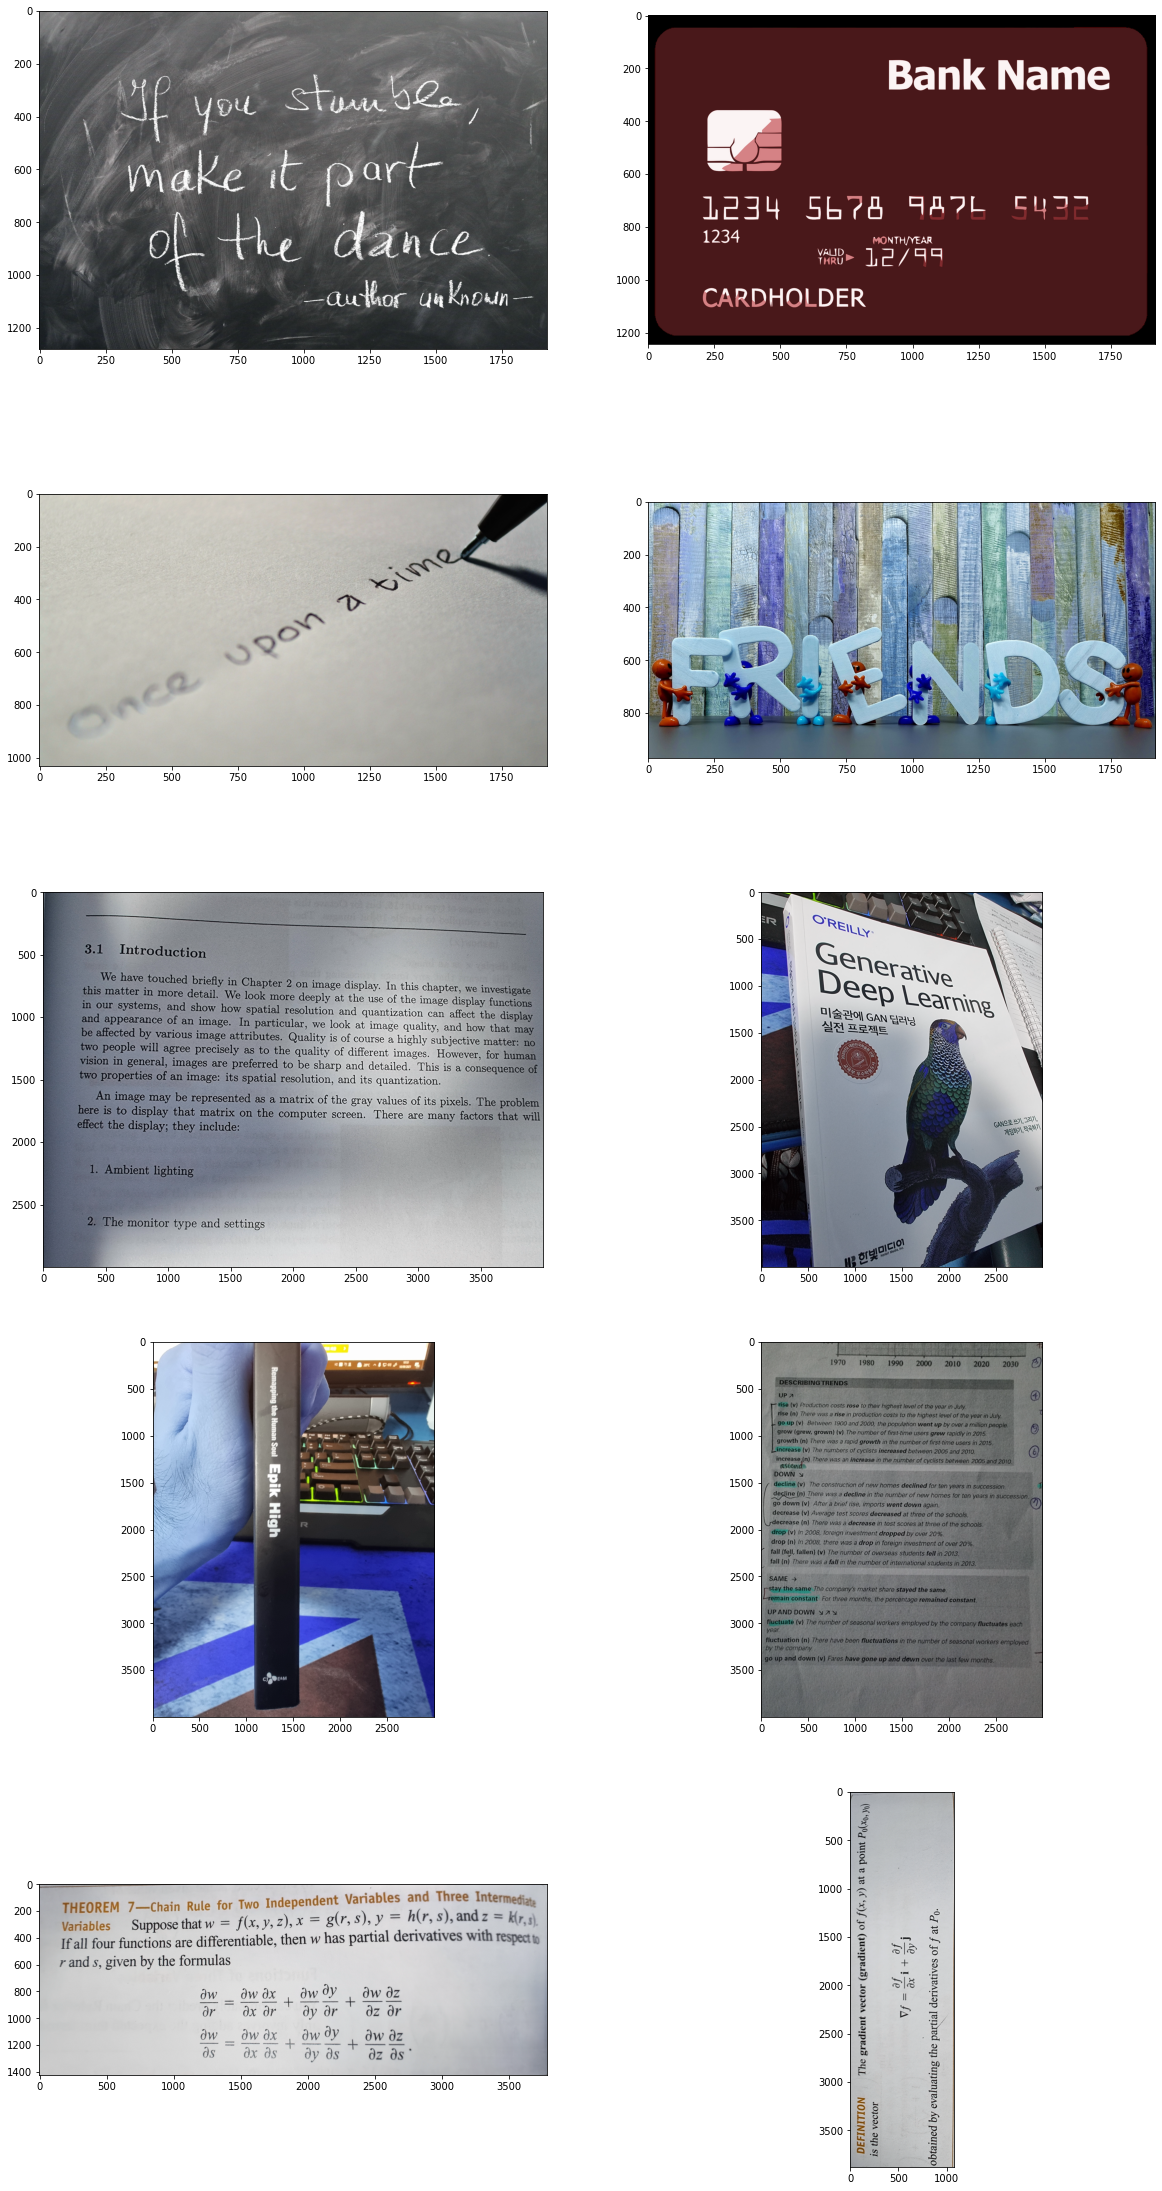

In [53]:
import cv2
imglist = [f'test{i}' for i in range(1,11)]
plt.figure(figsize=(20,40))

for i,img in enumerate(imglist):
    if not img=='test2':
        path = os.getenv('HOME') + f'/aiffel/ocr_python/data/{img}.jpg'
        
    elif img=='test2':
        path = os.getenv('HOME') + f'/aiffel/ocr_python/data/{img}.png'
    
    image = cv2.imread(path)
    plt.subplot(5,2,i+1)
    plt.imshow(image)
    
    
        

Step2
. 1) Google Vision API

In [8]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')
    wordlist, spotlist = [], []
    for text in texts:
        print('\n"{}"'.format(text.description))
        #print(text.description)
        # 탐지된 단어들을 리스트에 집어넣자
        wordlist.append(text.description)
        vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])
        spots = [(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices]
        spotlist.append(spots)
    
    print('bounds: {}'.format(','.join(vertices)))
    
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    return wordlist, spotlist

In [74]:
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.getenv('HOME')+ '/aiffel/ocr_python/my_google_api_key.json'

path = os.getenv('HOME') + '/aiffel/ocr_python/data/test1.jpg'

words, spots=detect_text(path)
spots

-rw-r--r-- 1 root root 2342 Sep 18 01:58 /aiffel/aiffel/ocr_python/my_google_api_key.json
Texts:

"f you stunnbla
make it part
of the dance
ster
-author un Known-
"
f you stunnbla
make it part
of the dance
ster
-author un Known-


"f"
f

"you"
you

"stunnbla"
stunnbla

"make"
make

"it"
it

"part"
part

"of"
of

"the"
the

"dance"
dance

"ster"
ster

"-author"
-author

"un"
un

"Known-"
Known-
bounds: (1548,1020),(1772,1020),(1772,1115),(1548,1115)


[[(334, 197), (1772, 197), (1772, 1123), (334, 1123)],
 [(496, 267), (623, 259), (636, 474), (509, 482)],
 [(624, 258), (838, 245), (851, 460), (638, 474)],
 [(919, 240), (1597, 197), (1610, 413), (933, 456)],
 [(336, 528), (775, 532), (773, 695), (334, 691)],
 [(868, 530), (991, 531), (989, 682), (866, 681)],
 [(1088, 512), (1523, 516), (1521, 723), (1086, 719)],
 [(408, 774), (615, 764), (627, 1002), (420, 1013)],
 [(688, 777), (943, 764), (952, 947), (697, 960)],
 [(1112, 763), (1663, 736), (1672, 919), (1121, 947)],
 [(931, 242), (1218, 244), (1217, 390), (930, 388)],
 [(1004, 1020), (1387, 1020), (1387, 1123), (1004, 1123)],
 [(1440, 1068), (1527, 1068), (1527, 1123), (1440, 1123)],
 [(1548, 1020), (1772, 1020), (1772, 1115), (1548, 1115)]]

In [75]:
words

['f you stunnbla\nmake it part\nof the dance\nster\n-author un Known-\n',
 'f',
 'you',
 'stunnbla',
 'make',
 'it',
 'part',
 'of',
 'the',
 'dance',
 'ster',
 '-author',
 'un',
 'Known-']

> 영역을 시각화하려 했는데, 직사각형 영역이 아니었기에 따로 구현이 필요했다.

In [2]:
## vison api detection 영역 시각화를 위한 함수!
def croppings(path,spots):
    img = cv2.imread(path,-1)
    print(img.shape)
    # 검정색 마스크 추가 


    plt.figure(figsize=(20,40))
    for i, spot in enumerate(spots):
    
        mask = np.zeros(img.shape, dtype=np.uint8)
        roi=np.array([spot],dtype=np.int32)
        # # mask가 적용되면 wipe out 이 일어나지 않도록 ROI를 채워준다.
        channel_count = img.shape[2]
        ignore_mask_color = (255,)*channel_count
        cv2.fillPoly(mask, roi, ignore_mask_color)

        # apply the mask
        masked_image = cv2.bitwise_and(img, mask)
        #     print(masked_image.shape)
        plt.subplot(len(spots),1,i+1)
        plt.imshow(masked_image)

(1280, 1920, 3)


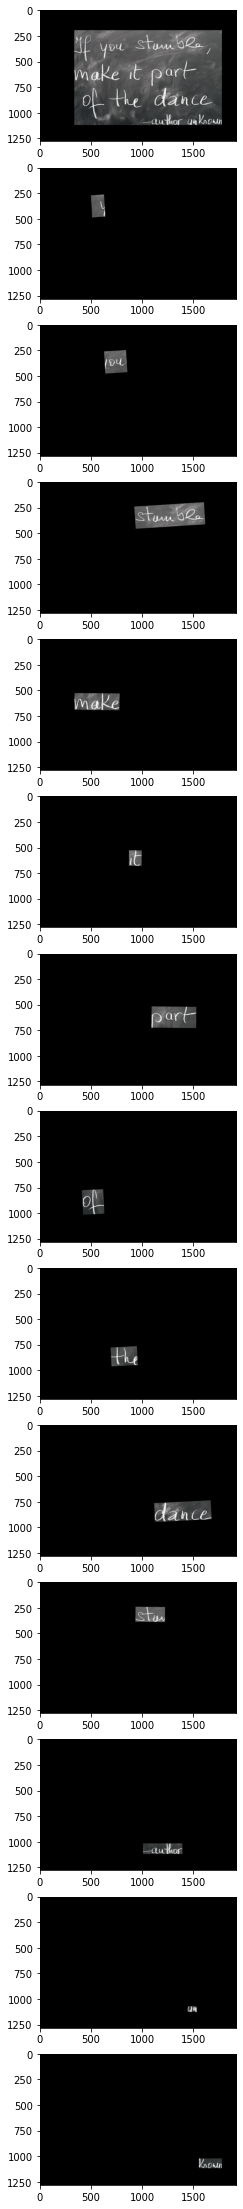

In [57]:
croppings(path,spots)



> 조금 오류가 있었지만 Vision api는 성능이 괜찮은 것 같다.

2) Keras_ocr

In [58]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [59]:
name_list=[f'test{i}' for i in range(1,11)]
img_list, prediction_groups=[],[]
for img in name_list:
    if not img=='test2':
        path = os.getenv('HOME') + f'/aiffel/ocr_python/data/{img}.jpg'
    
            
    image = keras_ocr.tools.read(path)
    prediction = pipeline.recognize([path])
    img_list.append(image)
    prediction_groups.append(prediction)
print(len(prediction_groups))
prediction_groups[0][0]


10


[('star',
  array([[ 930.43964,  246.44426],
         [1307.2357 ,  259.90125],
         [1302.2963 ,  398.207  ],
         [ 925.5001 ,  384.75   ]], dtype=float32)),
 ('gro',
  array([[1329.375,  249.375],
         [1584.375,  249.375],
         [1584.375,  380.625],
         [1329.375,  380.625]], dtype=float32)),
 ('f',
  array([[301.875, 262.5  ],
         [506.25 , 262.5  ],
         [506.25 , 487.5  ],
         [301.875, 487.5  ]], dtype=float32)),
 ('ydic',
  array([[582.00305, 327.21423],
         [827.95825, 319.1058 ],
         [832.74725, 464.37372],
         [586.7921 , 472.48215]], dtype=float32)),
 ('pac',
  array([[1038.9889 ,  576.5211 ],
         [1509.5005 ,  473.76566],
         [1549.4156 ,  656.5356 ],
         [1078.904  ,  759.2911 ]], dtype=float32)),
 ('ic',
  array([[866.25 , 534.375],
         [995.625, 534.375],
         [995.625, 690.   ],
         [866.25 , 690.   ]], dtype=float32)),
 ('meke',
  array([[334.5797 , 557.55286],
         [777.5597 , 535.180

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


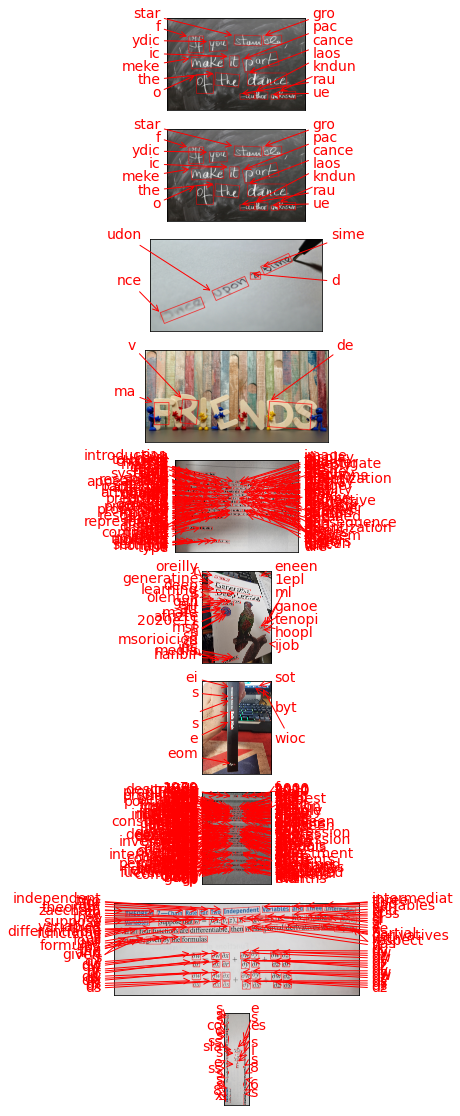

In [60]:
fig, axes = plt.subplots(nrows=len(img_list), figsize=(40,20))
for idx,ax in enumerate(axes):
    keras_ocr.tools.drawAnnotations(image=img_list[idx],
                                  predictions = prediction_groups[idx][0],ax=ax)

> 잘 안보인다.. 따로 봐야겠다.

<Figure size 432x288 with 0 Axes>

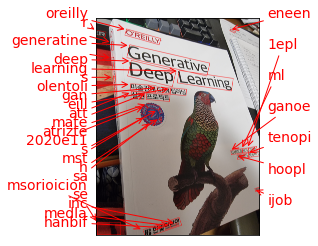

In [61]:
plt.figure()
keras_ocr.tools.drawAnnotations(image=img_list[5],
                                  predictions = prediction_groups[5][0])
plt.show()

<Figure size 7200x7200 with 0 Axes>

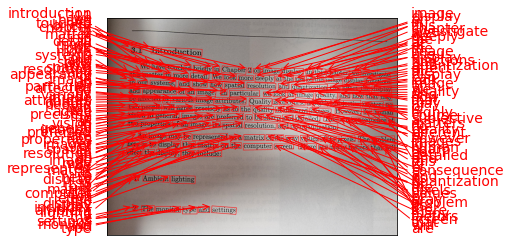

In [62]:
plt.figure(figsize=(100,100))
keras_ocr.tools.drawAnnotations(image=img_list[4],
                                  predictions = prediction_groups[4][0])
plt.show()

> 2번 모델은 인쇄된 텍스트 인식을 잘 해준다. 근데 따로 텍스트를 추출하려면 또 구현도 따로 해야되고, 기울어진 글씨와 손글씨는 잘 인식하지 못했다.

3) Tesseract

In [63]:

work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/data/test1.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png


In [64]:
# def recognize_images(cropped_image_path_list):
#     custom_oem_psm_config = r'--oem 3 --psm 7'
    
#     for image_path in cropped_image_path_list:
#         image = Image.open(image_path)
#         recognized_data = pytesseract.image_to_string(
#             image, lang='eng',    # 한국어라면 lang='kor'
#             config=custom_oem_psm_config,
#             output_type=Output.DICT
#         )
#         print(recognized_data['text'])
#     print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)


Agnce


ie

rT. | |

va

mr 7 eye

Se

et


eee

psi

| | ee

Done


> 알수 없는 단어들이 추출되었다. tesseract는 내 개발 계획과는 맞지 않는 듯 하다.

# 잠시 멈춤

> Handwritting에 대한 성능이 생각보다 많이 좋지 않았다.  
1)번의 Vision API에서 그나마 나은 성능을 보였는데, 분석할 거리가 생기지 않아,  
**한눈에 들어오는 인쇄된 text**로만 한정하여 다시 실험하였다.

1) Google Vision API

In [76]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.getenv('HOME')+ '/aiffel/ocr_python/my_google_api_key.json'

path = os.getenv('HOME') + '/aiffel/ocr_python/data/test3.jpg'

words, spots=detect_text(path)
spots

Texts:

"Once upon a time
"
Once upon a time


"Once"
Once

"upon"
upon

"a"
a

"time"
time
bounds: (1259,291),(1533,161),(1589,280),(1315,409)


[[(188, 161), (1589, 161), (1589, 915), (188, 915)],
 [(188, 795), (595, 603), (652, 723), (245, 915)],
 [(702, 554), (1073, 379), (1129, 497), (758, 672)],
 [(1140, 347), (1254, 293), (1310, 412), (1196, 465)],
 [(1259, 291), (1533, 161), (1589, 280), (1315, 409)]]

In [77]:
words

['Once upon a time\n', 'Once', 'upon', 'a', 'time']

(1030, 1920, 3)


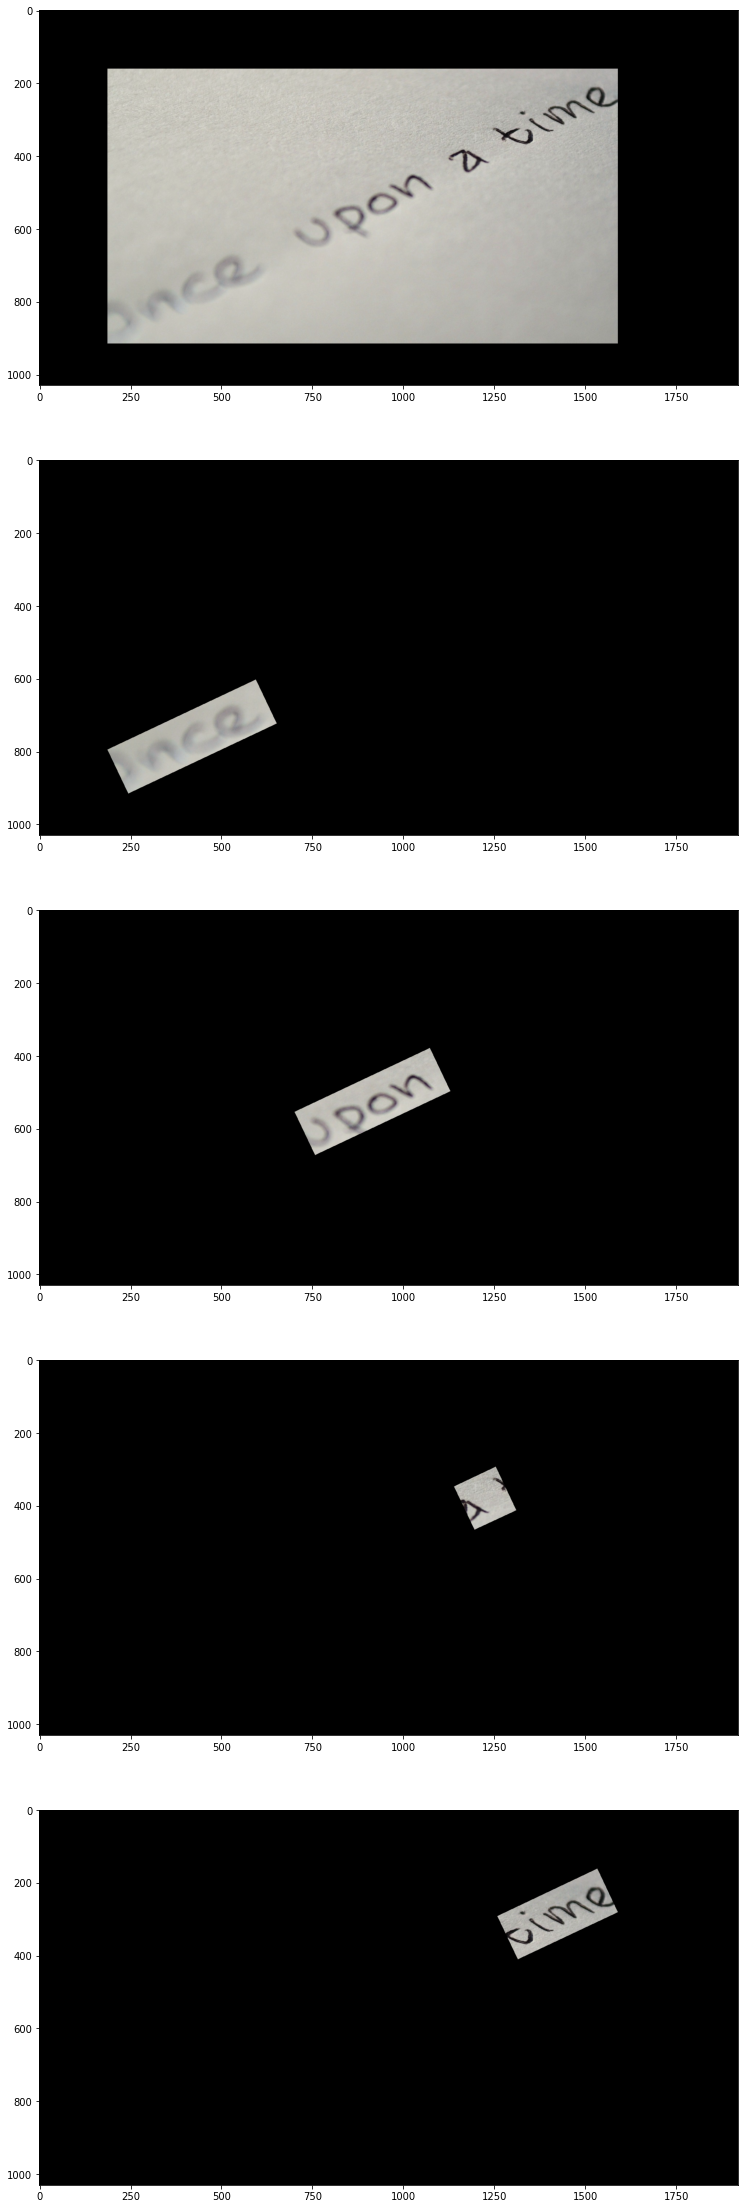

In [78]:
croppings(path,spots)

> detection이 어설픈 부분도 찰떡같이 해석하네. 맘에 든다. wordlist로 받고 사진이랑 같이 보여주면 좋겠다.

2번 방법

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


<Figure size 432x288 with 0 Axes>

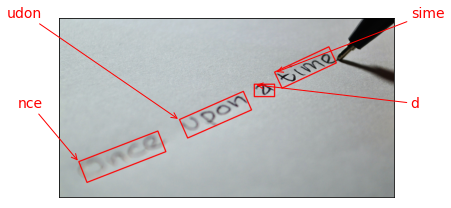

In [67]:
plt.figure()
keras_ocr.tools.drawAnnotations(image=img_list[2],
                                  predictions = prediction_groups[2][0])
plt.show()

> detection은 잘하는데 recognition이 좋지 않네.

3번 방법

In [68]:

work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/data/test3.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)



/aiffel/aiffel/ocr_python/0000.png


In [69]:
recognize_images(cropped_image_path_list)

. a a weg

Done


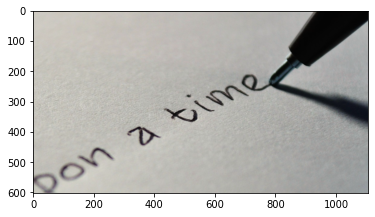

In [70]:
img = cv2.imread(cropped_image_path_list[0])
plt.imshow(img)

> 3번 모델은 역시나 실망스럽다.

## 개발자의 결단
- 기울어진 글자를 인식하는 모델은 Google vision API 밖에 없음(월등한 성능을 보임)
- 2번 모델은 detection은 잘하지만 recognition에서 성능이 떨어짐
- 3번 모델은 그냥 별로다.

>  1번 모델로 가자!

`detect_text` 함수를 통해 wordlist spotlist를 리턴해줌  
`croppings` 함수를 통해 시각화
파파고 번역기 

In [1]:
!ls -l $GOOGLE_APPLICATION_CREDENTIALS


import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.getenv('HOME')+ '/aiffel/ocr_python/my_google_api_key.json'
name_list=[f'test{i}' for i in range(1,11)]


total 21140
-rw-r--r-- 1 root root  622559 Sep 18 16:01  0000.png
-rw-r--r-- 1 root root  167457 Sep 18 16:00  0001.png
-rw-r--r-- 1 root root   19813 Sep 18 16:00  0002.png
-rw-r--r-- 1 root root  375556 Sep 18 16:00  0003.png
-rw-r--r-- 1 root root   56278 Sep 18 16:00  0004.png
-rw-r--r-- 1 root root   72452 Sep 18 16:00  0005.png
-rw-r--r-- 1 root root   20731 Sep 18 16:00  0006.png
-rw-r--r-- 1 root root   34570 Sep 18 16:00  0007.png
-rw-r--r-- 1 root root   11088 Sep 18 16:00  0008.png
-rw-r--r-- 1 root root   15343 Sep 18 16:00  0009.png
-rw-r--r-- 1 root root   12104 Sep 18 16:00  0010.png
-rw-r--r-- 1 root root 3196607 Sep 18 16:00  0011.png
-rw-r--r-- 1 root root    9258 Sep 18 16:00  0012.png
-rw-r--r-- 1 root root    6559 Sep 18 15:59  0013.png
-rw-r--r-- 1 root root    7378 Sep 18 15:59  0014.png
-rw-r--r-- 1 root root    5434 Sep 18 15:59  0015.png
-rw-r--r-- 1 root root    7885 Sep 18 15:59  0016.png
-rw-r--r-- 1 root root    7228 Sep 18 15:59  0017.png
-rw-r--r-- 1 roo

Texts:

"f you stunnbla
make it part
of the dance
ster
-author un Known-
"

"f"

"you"

"stunnbla"

"make"

"it"

"part"

"of"

"the"

"dance"

"ster"

"-author"

"un"

"Known-"
bounds: (1548,1020),(1772,1020),(1772,1115),(1548,1115)
['f you stunnbla  make it part  of the dance  ster   author un Known   ', 'f', 'you', 'stunnbla', 'make', 'it', 'part', 'of', 'the', 'dance', 'ster', ' author', 'un', 'Known ']
(1280, 1920, 3)
Texts:

"Bank Name
1234 5678 9426 54
1234
MONTH/YEAR
VALID
THRU
► 12/99
CARDHOLDER
"

"Bank"

"Name"

"1234"

"5678"

"9426"

"54"

"1234"

"MONTH/YEAR"

"VALID"

"THRU"

"►"

"12/99"

"CARDHOLDER"
bounds: (216,1032),(819,1032),(819,1103),(216,1103)
['Bank Name  1234 5678 9426 54  1234  MONTH YEAR  VALID  THRU    12 99  CARDHOLDER  ', 'Bank', 'Name', '1234', '5678', '9426', '54', '1234', 'MONTH YEAR', 'VALID', 'THRU', ' ', '12 99', 'CARDHOLDER']
(1245, 1920, 4)
Texts:

"Once upon a time
"

"Once"

"upon"

"a"

"time"
bounds: (1259,291),(1533,161),(1589,280),(1315,409

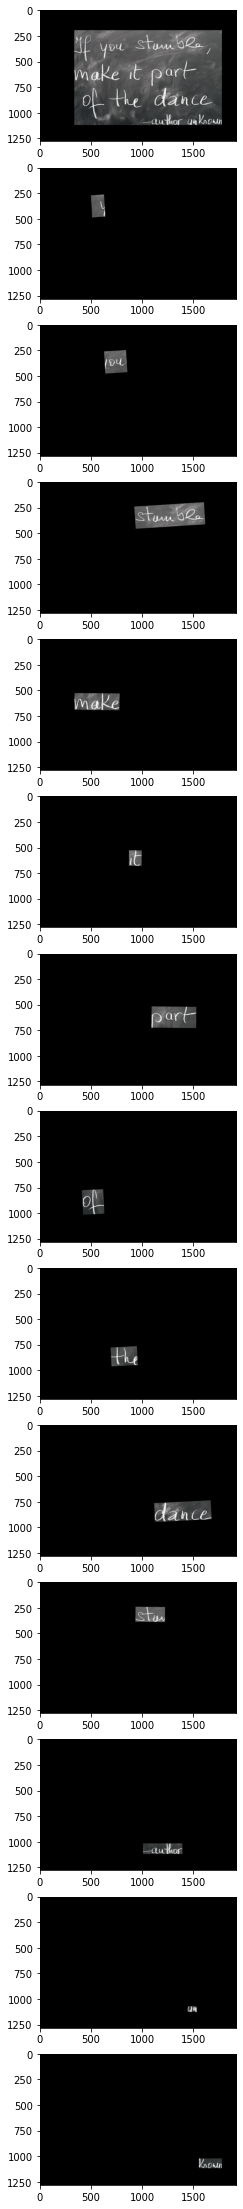

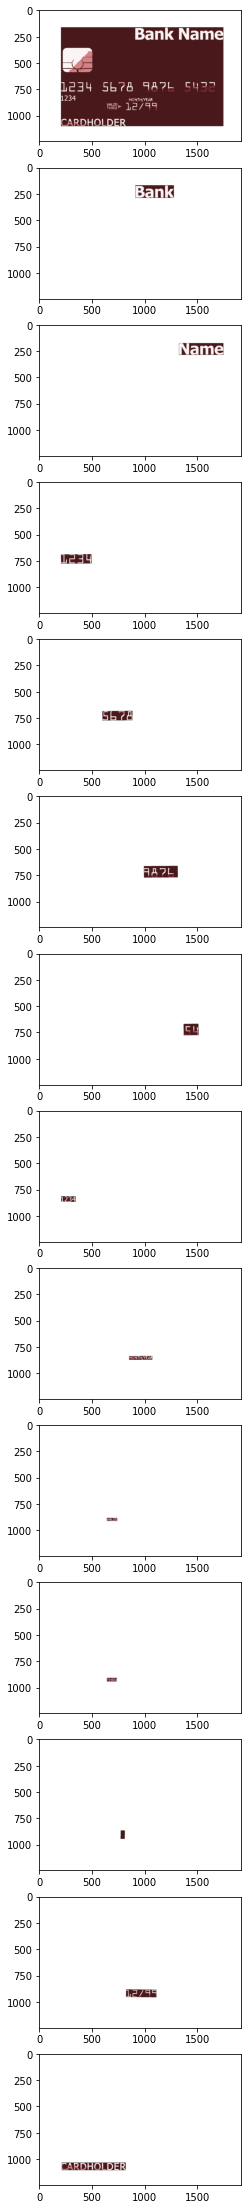

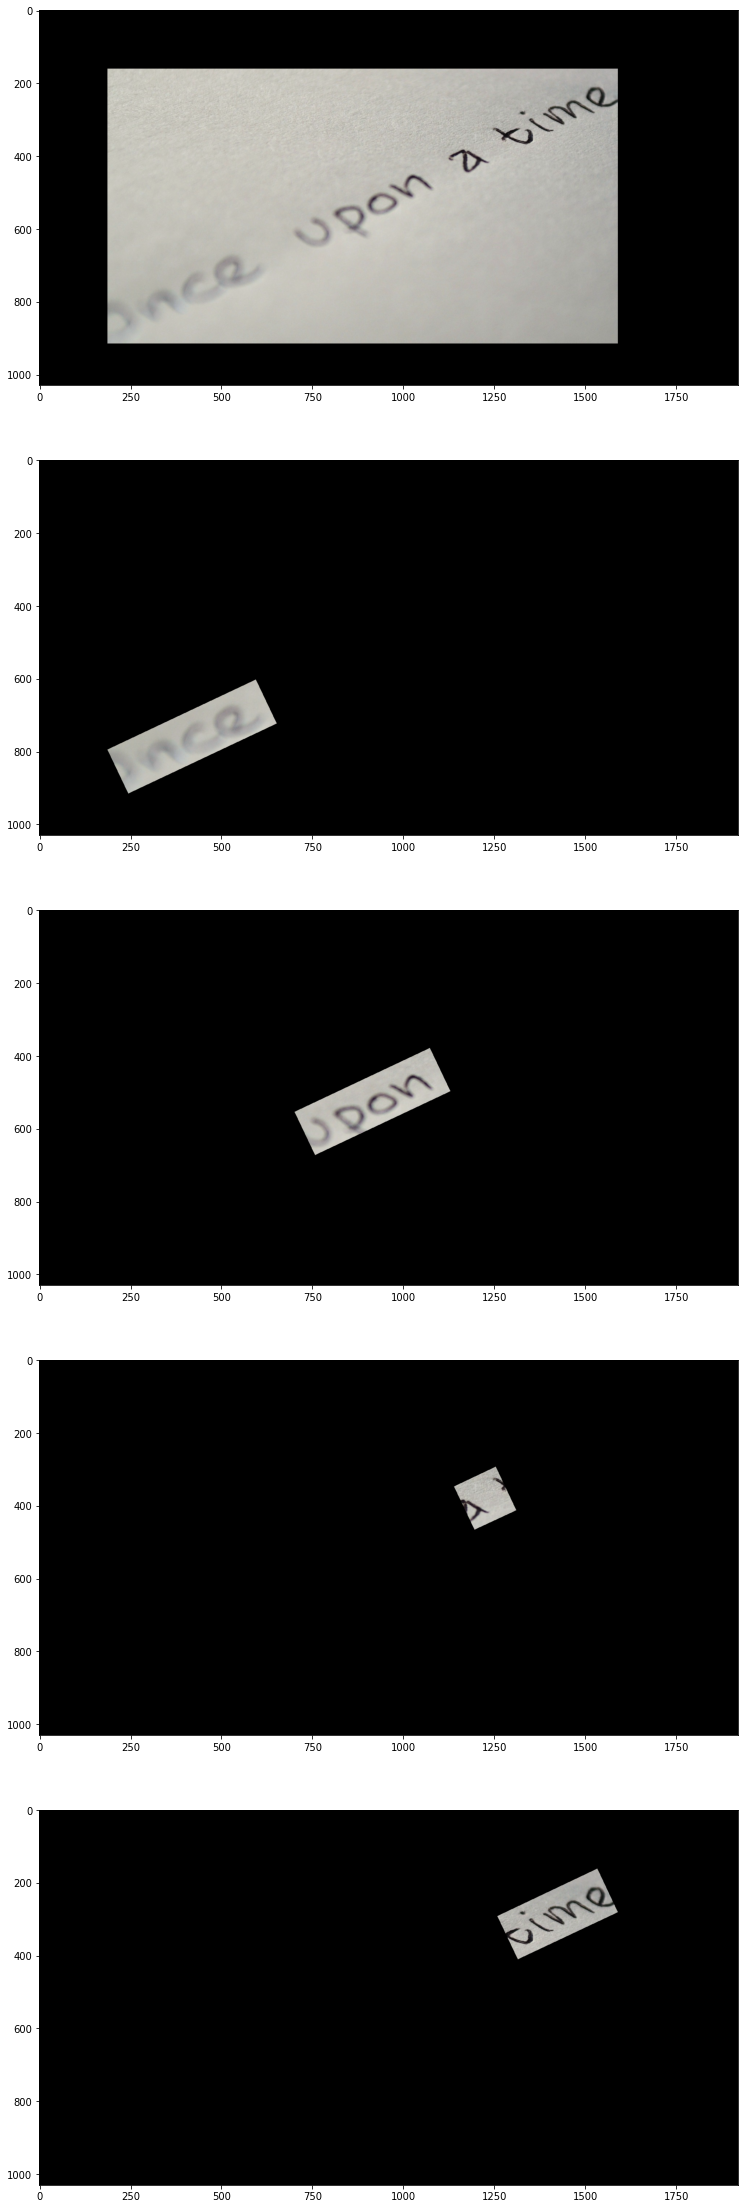

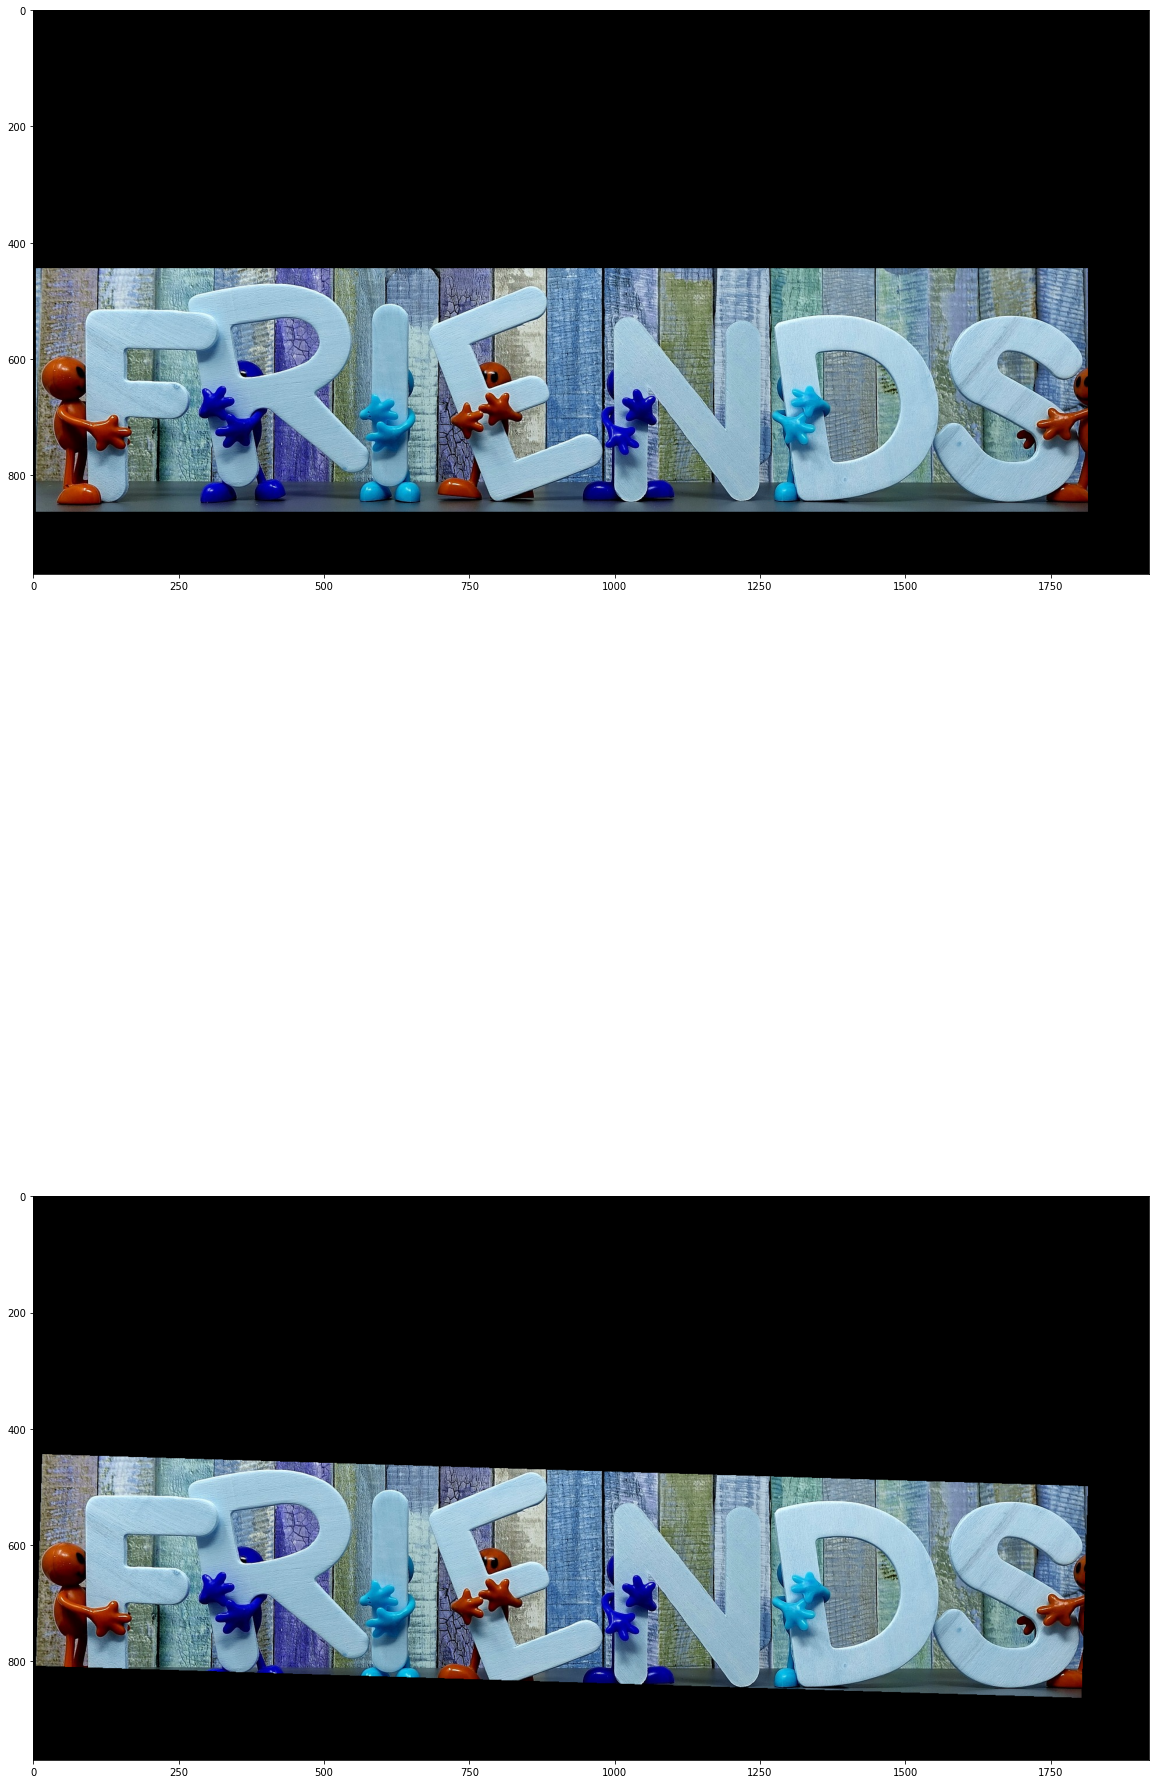

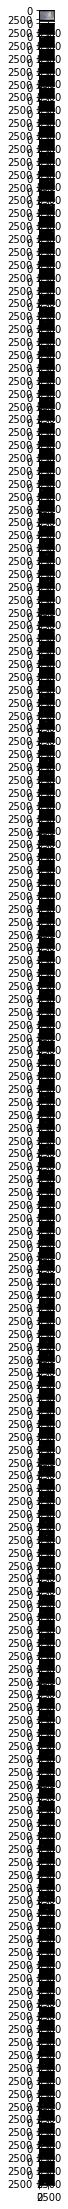

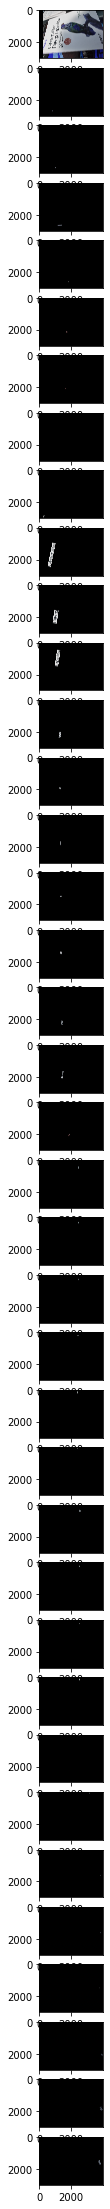

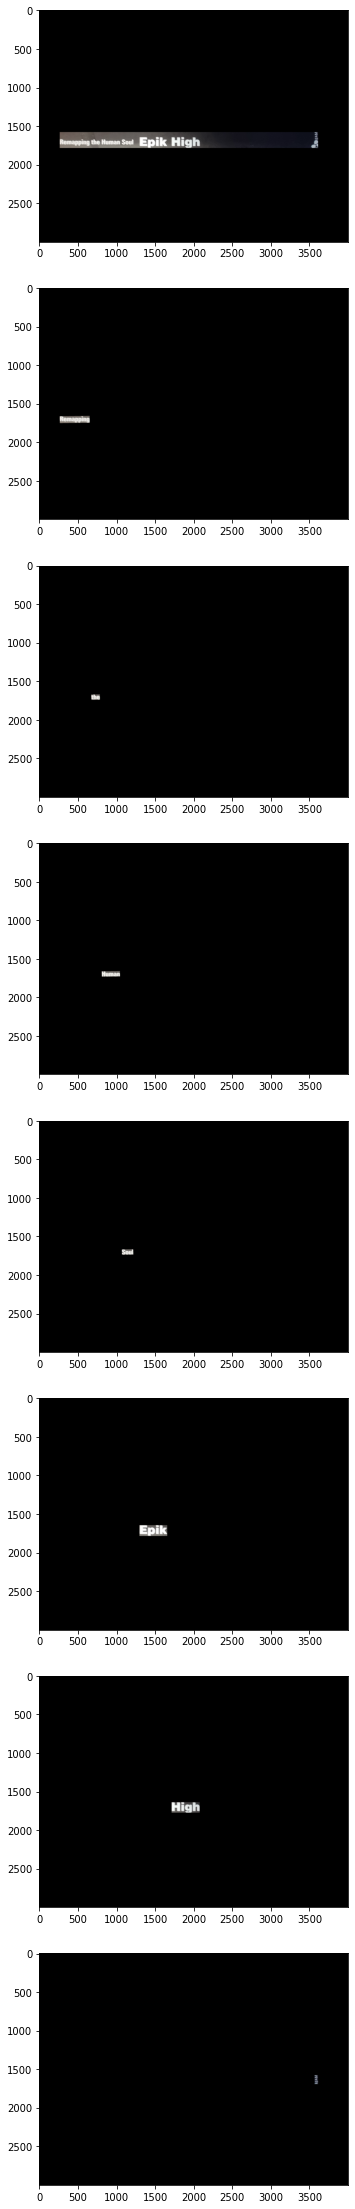

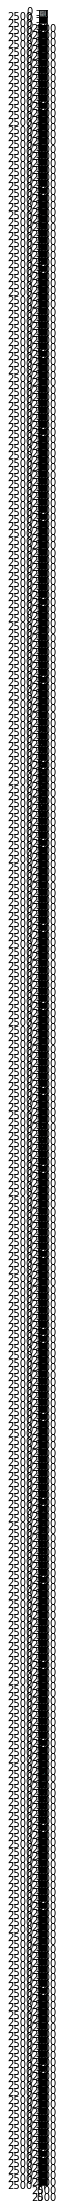

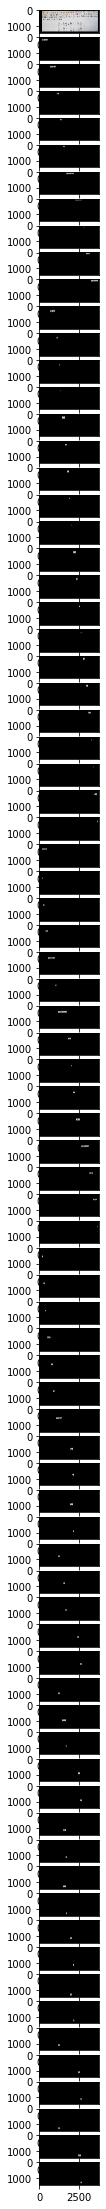

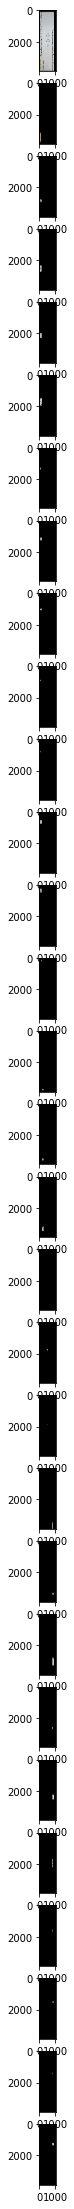

In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google_trans_new import google_translator
from word2word import Word2word
import re

translator = google_translator()
# en2kr = Word2word("en", "ko")

for img in name_list:
    if not img=='test2':
        path = os.getenv('HOME') + f'/aiffel/ocr_python/data/{img}.jpg'
    else:
        path = os.getenv('HOME') + f'/aiffel/ocr_python/data/{img}.png'

    words, spots=detect_text(path)
    words  = [word.replace('\n','  ') for word in words]
    words = [re.sub(r"[^a-zA-Z0-9]"," ",word) for word in words]
    print(words)

#         result = translator.translate(words[3], lang_src='ko')

    croppings(path,spots)

        

> 추가로 번역기능이 가능한 서비스를 구현해보려 했는데 제대로 된 api가 없었다.(네이버 파파고, 구글 번역 모두 알 수 없는 오류를 보였다.) 우선 이정도로 상부에 보고하고 서비스 고도화는 함께 논의해보면 좋겠다고 생각했다. 그럼 오늘 개발일기 끝!

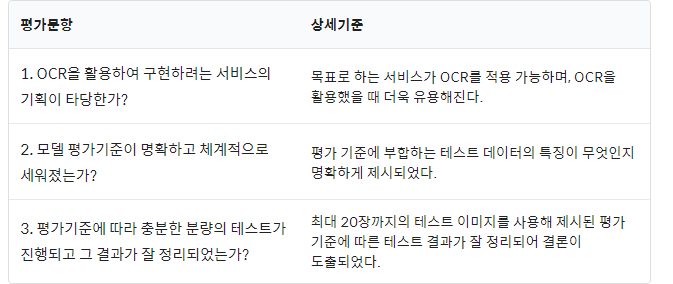

# Retrospect
- 결론은 Google vision api가 제일 좋다. 기울어진 문자도 , 손글씨도 잘 인식한다. 
- 탐지된 문자를 모두 시각회하는데에는 더 좋은 방법이 필요해 보인다.